[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/SolutionHW13.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/SolutionHW13.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Homework assignment 13

Simulate the growth of a bacterial colony.
During a fixed time interval a bacterium divides into two individuals with the
probability $p$, and with the probability $1 - p$ it dies.
This is repeated independently in each generation.
Start with a single bacterium and simulate as many generations as makes sense.

Repeat this simulation $n$ times (e.g. $n = 100$) and estimate the probability
$p_E$ with which the bacteria will die out.
Choose a few different values for $p$ and
compare $p_E$ as a function of $p$ with the theoretical result

\[ p_E = \min \left( 1, \; \frac{1-p}{p} \right) . \]

In [2]:
def bacsim(p, N = 100, gmax = 100, nmax = 1e6):
    """
    BACSIM simuliert das Wachstum einer Bakterienkolonie mit 
    Teilungsrate p und gibt die gefundene Ausloeschungswahrscheinlichkeit 
    pE zurueck.
    Parameter:
    - Teilungsrate p
    - Zahl der Simulationen N
    - maximale Zahl der Generationen gmax
    - maximale Zahl der Bakterien nmax
    """
    ex = 0 #Zaehler fuer die Simulationen, in denen Ausloeschung auftritt
    for _ in range(N):
        n = 1 # Zahl der Bakterien
        g = 1 # Generation
        while (g < gmax) & (n < nmax) & (n > 0):
            r = np.random.rand(n)
            n = 2*np.sum(r <= p)
            g += 1
        if n == 0:
            ex += 1
    return ex/N

In [3]:
p_sim = np.linspace(0,1,11)
p_E_sim = np.array([bacsim(p) for p in p_sim])

In [4]:
p_E = lambda p: np.minimum(1, (1-p)/p)

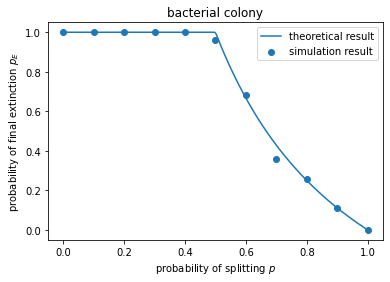

In [5]:
p = np.linspace(0,1,200)
p = np.delete(p, [0])
fig, ax = plt.subplots()
ax.plot(p, p_E(p),label="theoretical result")
ax.scatter(p_sim, p_E_sim,label="simulation result")
ax.set_title('bacterial colony')
ax.set(xlabel='probability of splitting $p$', ylabel='probability of final extinction $p_E$')
ax.legend();

See also [Extinction criterion for Galton–Watson process](https://en.m.wikipedia.org/wiki/Galton–Watson_process).